Tên: Phùng Nghĩa Phúc

MSV: 20127284

1. Import Thư viện

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import layers
from keras import models


2. MNIST Dataset

In [ ]:
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# đếm số lượng train labels duy nhất 
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# dếm số lượng test labels duy nhất
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


3. Data visualization

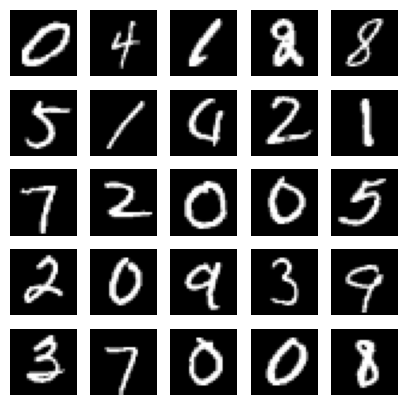

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

4. Thiet ke mang neural network 3 lop: 1 lop input, 1 lop an, va mot lop output

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
image_size = x_train.shape[1]
input_size = image_size
input_size

784

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# lớp input với size 784, lớp ẩn với 512 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.2874 - accuracy: 0.9189 - val_loss: 0.1252 - val_accuracy: 0.9652
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1196 - accuracy: 0.9650 - val_loss: 0.0922 - val_accuracy: 0.9723
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0770 - accuracy: 0.9776 - val_loss: 0.0820 - val_accuracy: 0.9775
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.0695 - val_accuracy: 0.9802
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.0671 - val_accuracy: 0.9805
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9915 - val_loss: 0.0656 - val_accuracy: 0.9815
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.0686 - val_accuracy: 0.9817
Epoch 

5. Thuc nghiem so luong node an voi: 100, 200 va 500 tren cac tap dataset

5.1 so luong node an la: 100

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 100

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8908 - val_loss: 0.1815 - val_accuracy: 0.9518
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1921 - accuracy: 0.9447 - val_loss: 0.1325 - val_accuracy: 0.9637
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9585 - val_loss: 0.1066 - val_accuracy: 0.9710
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9741 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9781 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9814 - val_loss: 0.0811 - val_accuracy: 0.9783
Epoch 

5.2 So luong node an la: 200

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 200

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3392 - accuracy: 0.9063 - val_loss: 0.1681 - val_accuracy: 0.9540
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.9563 - val_loss: 0.1053 - val_accuracy: 0.9693
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9705 - val_loss: 0.0878 - val_accuracy: 0.9732
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9777 - val_loss: 0.0834 - val_accuracy: 0.9760
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9826 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9862 - val_loss: 0.0721 - val_accuracy: 0.9783
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0399 - accuracy: 0.9892 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 

5.3. So luong node an la: 500

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 500

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.2813 - accuracy: 0.9201 - val_loss: 0.1249 - val_accuracy: 0.9665
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1157 - accuracy: 0.9658 - val_loss: 0.0910 - val_accuracy: 0.9737
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0818 - val_accuracy: 0.9757
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0701 - val_accuracy: 0.9790
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0698 - val_accuracy: 0.9812
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.0715 - val_accuracy: 0.9802
Epoch 

6. Tăng số lượng lớp ảnh lên 2 và 3

6.1 Tăng số lượng lớp ảnh lên 2

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))


# lớp input với size 784, lớp ẩn 1 với 512 units, lớp ẩn 2 với 256 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.2374 - accuracy: 0.9300 - val_loss: 0.0907 - val_accuracy: 0.9727
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9736 - val_loss: 0.0673 - val_accuracy: 0.9813
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0772 - val_accuracy: 0.9780
Epoch 4/20
422/422 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0705 - val_accuracy: 0.9823
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0767 - val_accuracy: 0.9797
Epoch 

6.2 Tăng số lượng lớp ảnh lên 3

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))


# lớp input với size 784, lớp ẩn 1 với 512 units, lớp ẩn 2 với 256 units, lớp ẩn 2 với 128 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.2473 - accuracy: 0.9272 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9714 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 4/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0734 - val_accuracy: 0.9792
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.1006 - val_accuracy: 0.9747
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0748 - val_accuracy: 0.9807
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0737 - val_accuracy: 0.9818
Epoch 